In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('timeline_data.xlsx')
# df = df['Task Name' 'Duration']
df = df[::-1]
df

,Task Name,Start,Finish
7,Seminar and Final Report,2023-05-07,2023-06-16
6,Write Abstract,2023-05-06,2023-05-16
5,Experiment + Perform Sensitivity Analysis,2023-04-28,2023-05-13
4,Implement Time-based Metrics,2023-03-29,2023-04-28
3,Implement Action Flow + Time Simulation,2023-02-15,2023-03-29
2,Oral Progress Report,2023-02-15,2023-03-22
1,Write Project Proposal,2023-01-16,2023-02-15
0,Literature Review,2023-01-01,2023-02-15


d:\Anaconda\envs\cits4012_py37\lib\site-packages\ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


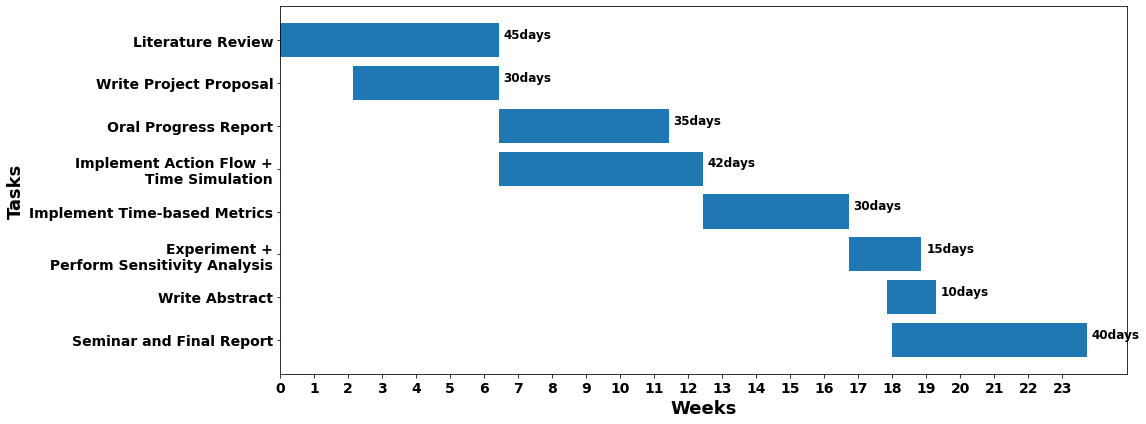

In [48]:
# project start date
from turtle import color
from textwrap import wrap

proj_start = df.Start.min()
# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.Finish-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

fig, ax = plt.subplots(1, figsize=(16,6))


ax.barh(df['Task Name'], df.days_start_to_end, left=df.start_num)

tasks = zip(df.days_start_to_end, df.end_num)

for w, (i, v) in enumerate(tasks):
    ax.text(v + 1, w + .05, str(i) + 'days', color='black', fontweight='bold', fontsize=12)

xticks = np.arange(0, 24, step=1)
ax.set_xticks(np.arange(165, step=7))
ax.set_xticklabels(xticks, weight='bold', fontsize=14)
labels =[i.replace('+', '+\n') for i in df['Task Name'] ]
ax.set_yticklabels(labels, weight='bold', fontsize=14)
plt.xlabel('Weeks',  weight='bold', fontsize=18)
plt.ylabel('Tasks', weight='bold', fontsize=18)
fig.tight_layout()
# plt.savefig('timeline')
plt.show()